# Subsets

![SmartSelect_20250304_140422_Samsung Notes.jpg](<attachment:SmartSelect_20250304_140422_Samsung Notes.jpg>)
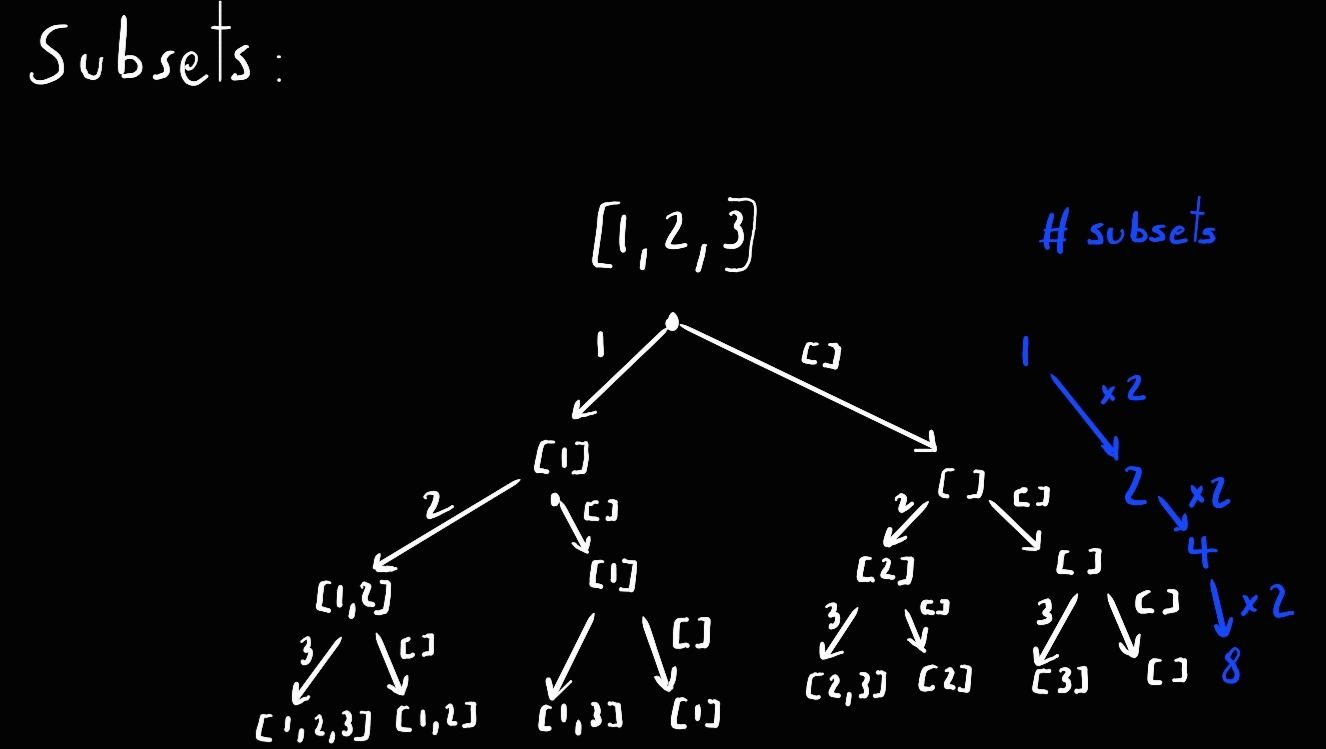

In [ ]:
from typing import List


class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        nums_len = len(nums)
        res = []
        subset = []

        def dfs(i):
            if i >= nums_len:
                res.append(subset.copy())
                return
            # decision to include nums[i]
            subset.append(nums[i])
            dfs(i + 1)
            # decision to NOT include nums[i]
            subset.pop()
            dfs(i + 1)

        dfs(0)
        return res


sol = Solution()
sol.subsets([1, 2, 3])

In [ ]:
# palindrome partitioning